In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
file_path = 'processedCleveland.data'
df = pd.read_csv(file_path)
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [33]:
df.columns = ['age','sex','cp','trestbps','chol','fbsreste','cg','thalach','exang','oldpeak','slope','ca','thal','num']

df.head

<bound method NDFrame.head of       age  sex   cp  trestbps   chol  fbsreste   cg  thalach  exang  oldpeak  \
0    67.0  1.0  4.0     160.0  286.0       0.0  2.0    108.0    1.0      1.5   
1    67.0  1.0  4.0     120.0  229.0       0.0  2.0    129.0    1.0      2.6   
2    37.0  1.0  3.0     130.0  250.0       0.0  0.0    187.0    0.0      3.5   
3    41.0  0.0  2.0     130.0  204.0       0.0  2.0    172.0    0.0      1.4   
4    56.0  1.0  2.0     120.0  236.0       0.0  0.0    178.0    0.0      0.8   
..    ...  ...  ...       ...    ...       ...  ...      ...    ...      ...   
297  45.0  1.0  1.0     110.0  264.0       0.0  0.0    132.0    0.0      1.2   
298  68.0  1.0  4.0     144.0  193.0       1.0  0.0    141.0    0.0      3.4   
299  57.0  1.0  4.0     130.0  131.0       0.0  0.0    115.0    1.0      1.2   
300  57.0  0.0  2.0     130.0  236.0       0.0  2.0    174.0    0.0      0.0   
301  38.0  1.0  3.0     138.0  175.0       0.0  0.0    173.0    0.0      0.0   

     slop

In [34]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbsreste    float64
cg          float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [35]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbsreste      2
cg            3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

In [36]:
old_column_names = df.columns.tolist()
new_column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

df.columns = new_column_names

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [37]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

In [38]:
df.shape

(302, 14)

In [39]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [40]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [41]:
for col in df.columns:
    display(df[col].value_counts())

age
58.0    19
57.0    17
54.0    16
59.0    14
52.0    13
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
64.0    10
41.0    10
67.0     9
42.0     8
45.0     8
43.0     8
63.0     8
53.0     8
55.0     8
61.0     8
65.0     8
50.0     7
66.0     7
46.0     7
48.0     7
47.0     5
49.0     5
35.0     4
70.0     4
68.0     4
39.0     4
69.0     3
71.0     3
40.0     3
34.0     2
37.0     2
38.0     2
29.0     1
77.0     1
74.0     1
76.0     1
Name: count, dtype: int64

sex
1.0    205
0.0     97
Name: count, dtype: int64

cp
4.0    144
3.0     86
2.0     50
1.0     22
Name: count, dtype: int64

trestbps
120.0    37
130.0    36
140.0    32
110.0    19
150.0    17
138.0    12
128.0    12
160.0    11
125.0    11
112.0     9
132.0     8
118.0     7
108.0     6
124.0     6
135.0     6
134.0     5
152.0     5
100.0     4
145.0     4
170.0     4
122.0     4
126.0     3
136.0     3
115.0     3
180.0     3
142.0     3
105.0     3
102.0     2
146.0     2
144.0     2
148.0     2
178.0     2
94.0      2
165.0     1
123.0     1
114.0     1
154.0     1
156.0     1
106.0     1
155.0     1
172.0     1
200.0     1
101.0     1
129.0     1
192.0     1
158.0     1
104.0     1
174.0     1
117.0     1
164.0     1
Name: count, dtype: int64

chol
234.0    6
204.0    6
197.0    6
269.0    5
212.0    5
        ..
340.0    1
160.0    1
394.0    1
184.0    1
131.0    1
Name: count, Length: 152, dtype: int64

fbs
0.0    258
1.0     44
Name: count, dtype: int64

restecg
0.0    151
2.0    147
1.0      4
Name: count, dtype: int64

thalach
162.0    11
160.0     9
163.0     9
152.0     8
125.0     7
         ..
127.0     1
97.0      1
129.0     1
190.0     1
90.0      1
Name: count, Length: 91, dtype: int64

exang
0.0    203
1.0     99
Name: count, dtype: int64

oldpeak
0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.9     5
3.0     5
1.5     5
0.5     5
2.2     4
3.6     4
2.4     3
0.9     3
3.4     3
0.3     3
4.0     3
4.2     2
1.1     2
2.5     2
3.2     2
2.9     1
5.6     1
2.1     1
6.2     1
1.3     1
3.1     1
3.8     1
0.7     1
3.5     1
2.3     1
4.4     1
Name: count, dtype: int64

slope
1.0    142
2.0    140
3.0     20
Name: count, dtype: int64

ca
0.0    175
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

thal
3.0    166
7.0    117
6.0     17
?        2
Name: count, dtype: int64

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [42]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [43]:
df.replace({"?":np.nan},inplace=True)
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [44]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

<Axes: >

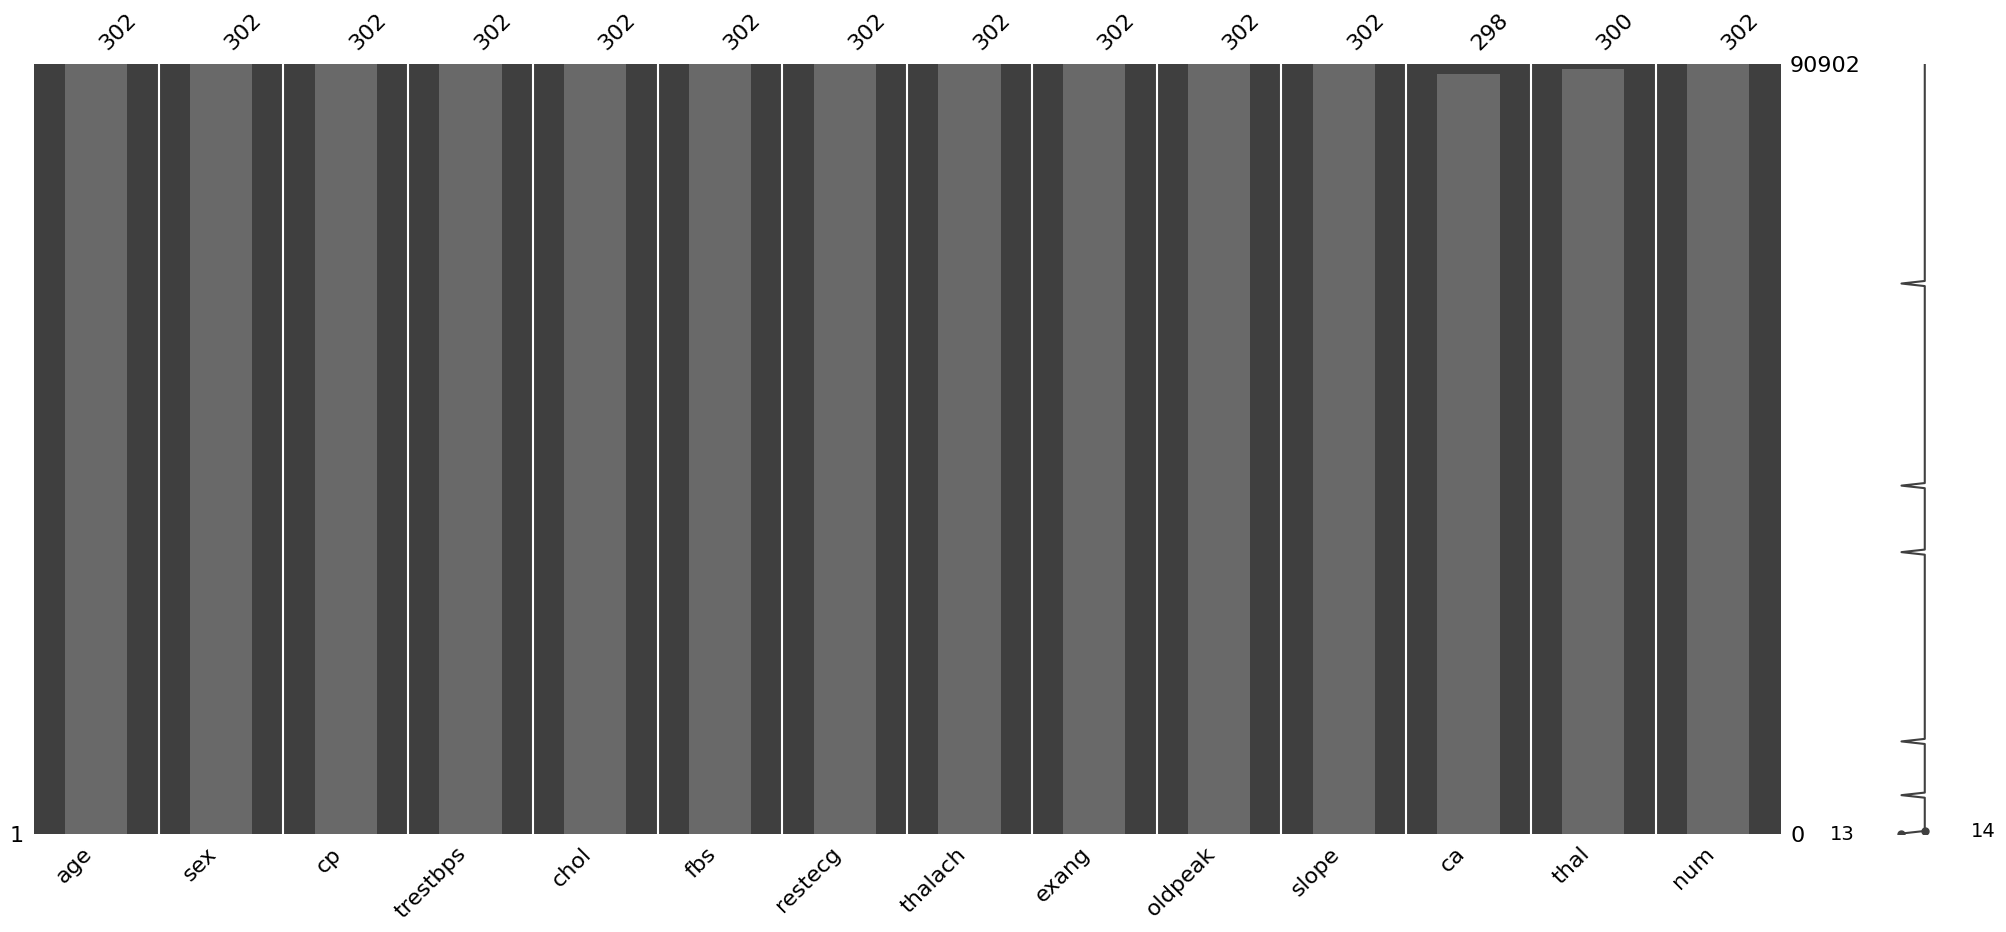

In [45]:
import missingno as msno
msno.matrix(df) 
msno.bar(df)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        298 non-null    object 
 12  thal      300 non-null    object 
 13  num       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [47]:
df = df.astype('int64', errors='ignore')

In [48]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       302 non-null    int64 
 1   sex       302 non-null    int64 
 2   cp        302 non-null    int64 
 3   trestbps  302 non-null    int64 
 4   chol      302 non-null    int64 
 5   fbs       302 non-null    int64 
 6   restecg   302 non-null    int64 
 7   thalach   302 non-null    int64 
 8   exang     302 non-null    int64 
 9   oldpeak   302 non-null    int64 
 10  slope     302 non-null    int64 
 11  ca        298 non-null    object
 12  thal      300 non-null    object
 13  num       302 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 33.2+ KB


In [52]:
df.fillna(df.median(),inplace=True)

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [53]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
297,45,1,1,110,264,0,0,132,0,1,2,0.0,7.0,1
298,68,1,4,144,193,1,0,141,0,3,2,2.0,7.0,2
299,57,1,4,130,131,0,0,115,1,1,2,1.0,7.0,3
300,57,0,2,130,236,0,2,174,0,0,2,1.0,3.0,1
301,38,1,3,138,175,0,0,173,0,0,1,0.0,3.0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       302 non-null    int64 
 1   sex       302 non-null    int64 
 2   cp        302 non-null    int64 
 3   trestbps  302 non-null    int64 
 4   chol      302 non-null    int64 
 5   fbs       302 non-null    int64 
 6   restecg   302 non-null    int64 
 7   thalach   302 non-null    int64 
 8   exang     302 non-null    int64 
 9   oldpeak   302 non-null    int64 
 10  slope     302 non-null    int64 
 11  ca        302 non-null    object
 12  thal      302 non-null    object
 13  num       302 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 33.2+ KB


In [59]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

df['ca'] = df['ca'].astype(np.int64)
df['thal'] = df['thal'].astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       302 non-null    int64
 1   sex       302 non-null    int64
 2   cp        302 non-null    int64
 3   trestbps  302 non-null    int64
 4   chol      302 non-null    int64
 5   fbs       302 non-null    int64
 6   restecg   302 non-null    int64
 7   thalach   302 non-null    int64
 8   exang     302 non-null    int64
 9   oldpeak   302 non-null    int64
 10  slope     302 non-null    int64
 11  ca        302 non-null    int64
 12  thal      302 non-null    int64
 13  num       302 non-null    int64
dtypes: int64(14)
memory usage: 33.2 KB


In [60]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
297,45,1,1,110,264,0,0,132,0,1,2,0,7,1
298,68,1,4,144,193,1,0,141,0,3,2,2,7,2
299,57,1,4,130,131,0,0,115,1,1,2,1,7,3
300,57,0,2,130,236,0,2,174,0,0,2,1,3,1
301,38,1,3,138,175,0,0,173,0,0,1,0,3,0


In [61]:
df.shape

(302, 14)

In [62]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [63]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       302 non-null    int64
 1   sex       302 non-null    int64
 2   cp        302 non-null    int64
 3   trestbps  302 non-null    int64
 4   chol      302 non-null    int64
 5   fbs       302 non-null    int64
 6   restecg   302 non-null    int64
 7   thalach   302 non-null    int64
 8   exang     302 non-null    int64
 9   oldpeak   302 non-null    int64
 10  slope     302 non-null    int64
 11  ca        302 non-null    int64
 12  thal      302 non-null    int64
 13  num       302 non-null    int64
dtypes: int64(14)
memory usage: 33.2 KB


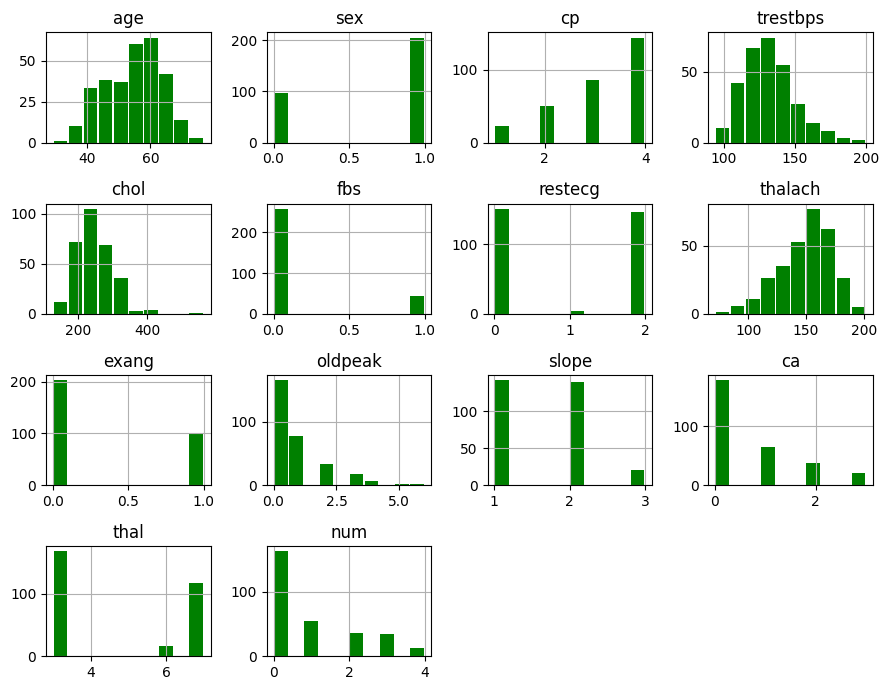

In [65]:
df.hist(rwidth = 0.9,color='green',figsize=(9,7))
plt.tight_layout()

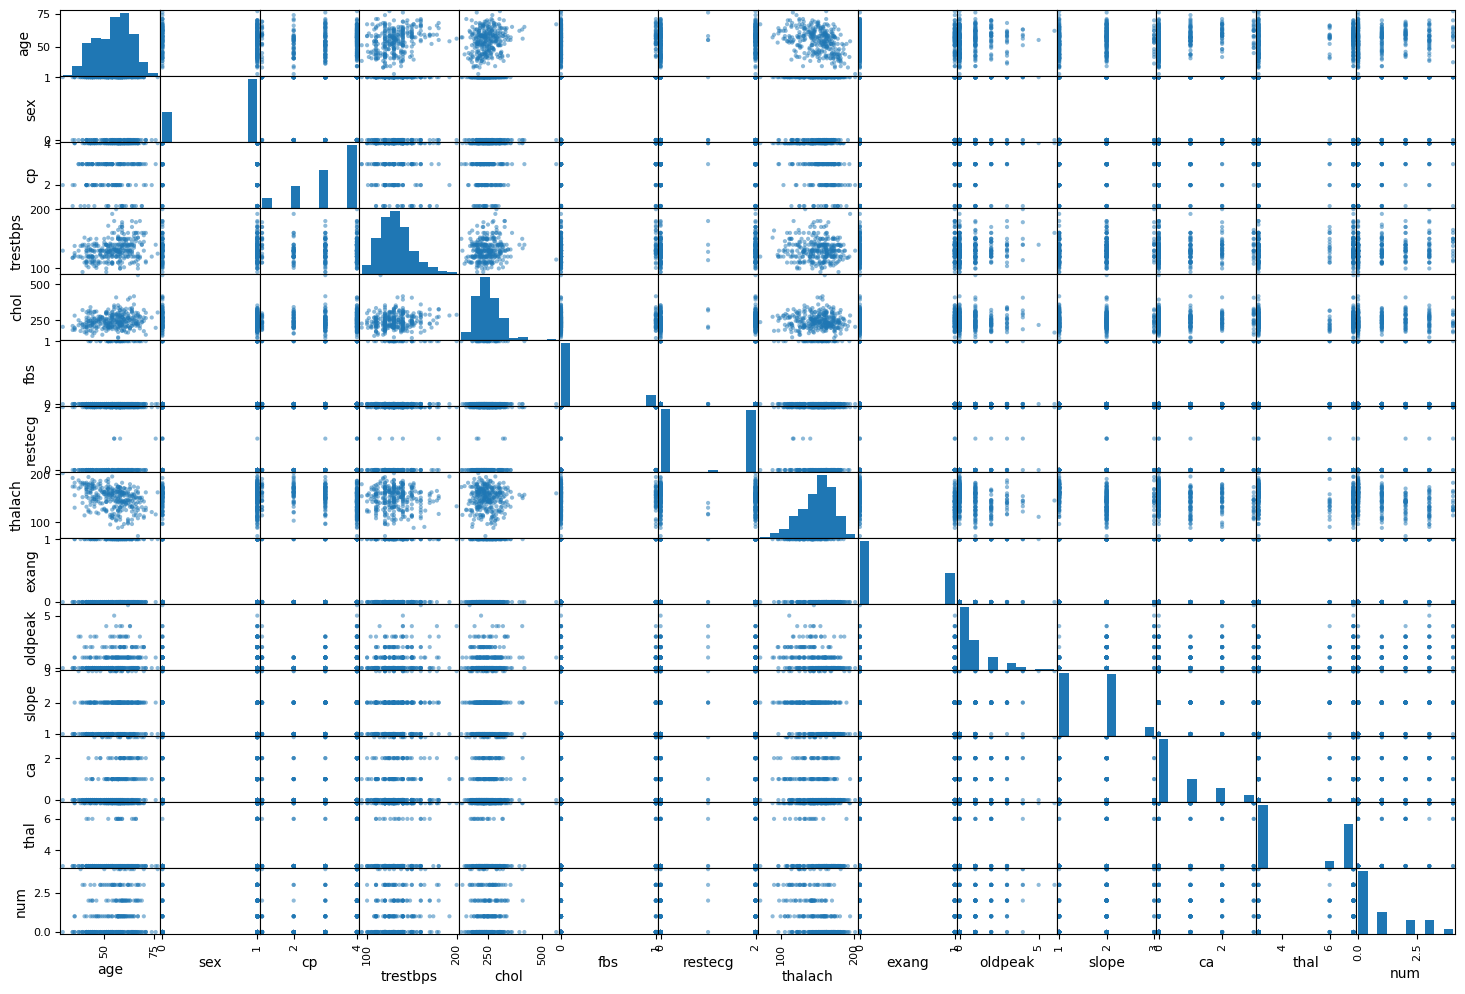

In [66]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(18,12));

In [68]:
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.099925,0.112326,0.283257,0.210120,0.112245,0.146142,-0.394448,0.094065,0.170494,0.156199,0.368415,0.126509,0.225809
sex,-0.099925,1.000000,0.015342,-0.066292,-0.199492,0.042863,0.019386,-0.048740,0.148019,0.092075,0.032671,0.087806,0.379651,0.226601
cp,0.112326,0.015342,1.000000,-0.030717,0.070950,-0.022524,0.075854,-0.337136,0.382394,0.230840,0.171926,0.229945,0.269475,0.405182
trestbps,0.283257,-0.066292,-0.030717,1.000000,0.130924,0.171127,0.144395,-0.045437,0.066627,0.184607,0.112752,0.099490,0.132991,0.159978
chol,0.210120,-0.199492,0.070950,0.130924,1.000000,0.012058,0.172249,-0.003417,0.060755,0.030656,-0.002085,0.123220,0.018946,0.070315
fbs,0.112245,0.042863,-0.022524,0.171127,0.012058,1.000000,0.062202,-0.008067,0.031514,0.013088,0.042630,0.147936,0.060007,0.065937
restecg,0.146142,0.019386,0.075854,0.144395,0.172249,0.062202,1.000000,-0.083591,0.087432,0.115577,0.127603,0.134486,0.022157,0.186769
thalach,-0.394448,-0.048740,-0.337136,-0.045437,-0.003417,-0.008067,-0.083591,1.000000,-0.378368,-0.327607,-0.389078,-0.265881,-0.274378,-0.415399
exang,0.094065,0.148019,0.382394,0.066627,0.060755,0.031514,0.087432,-0.378368,1.000000,0.274634,0.265491,0.144385,0.327262,0.395996
oldpeak,0.170494,0.092075,0.230840,0.184607,0.030656,0.013088,0.115577,-0.327607,0.274634,1.000000,0.552442,0.308422,0.322735,0.511795


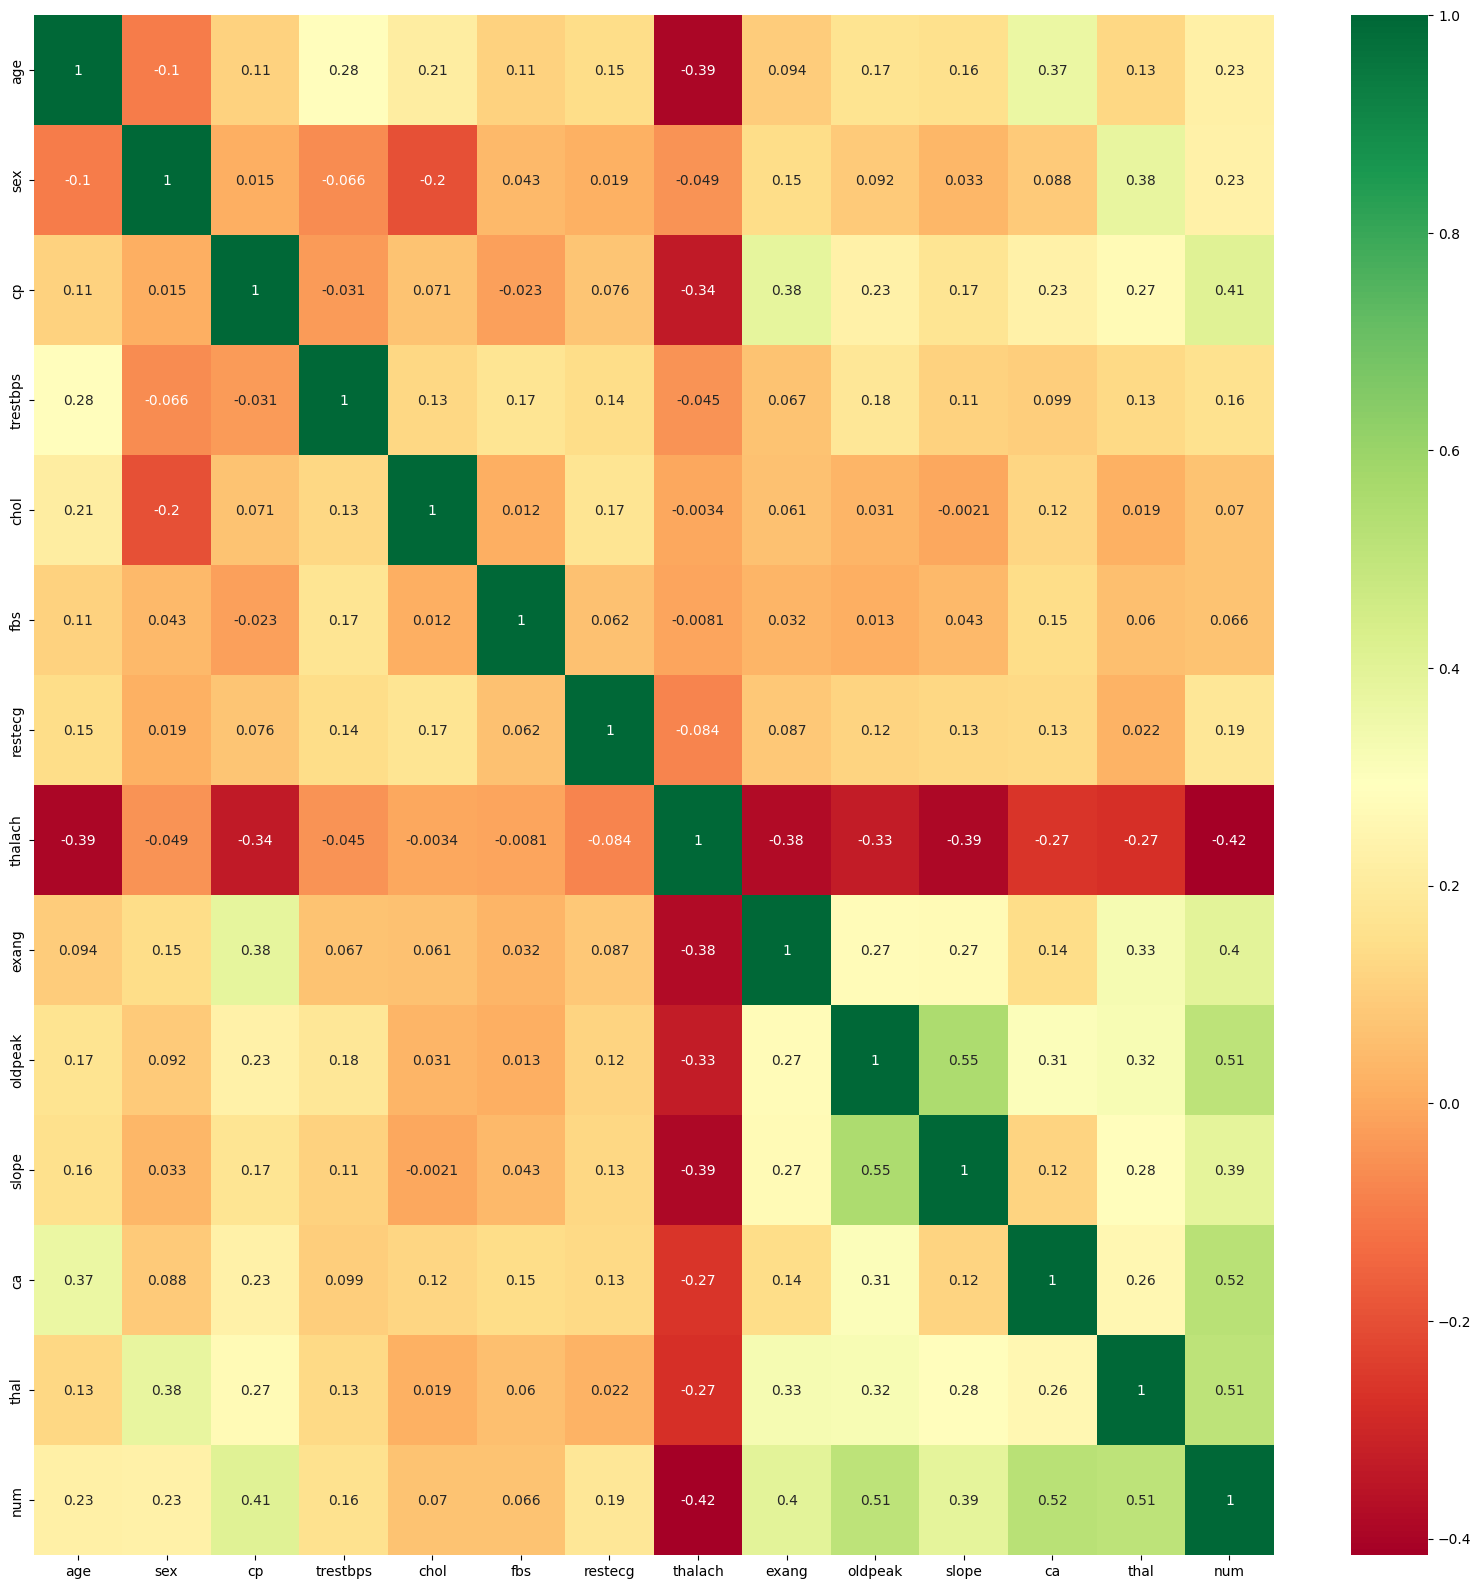

In [69]:
top_corr_features = corr.index 
plt.figure(figsize=(20,20)) #plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [70]:
df['num'].unique()

array([2, 1, 0, 3, 4], dtype=int64)

C:\Users\user\AppData\Local\Temp\ipykernel_3100\3721661147.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num',data=df,palette='viridis')


<Axes: xlabel='num', ylabel='count'>

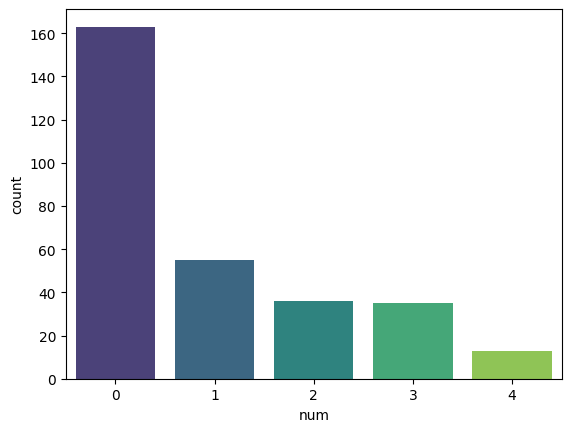

In [71]:
sns.countplot(x='num',data=df,palette='viridis')

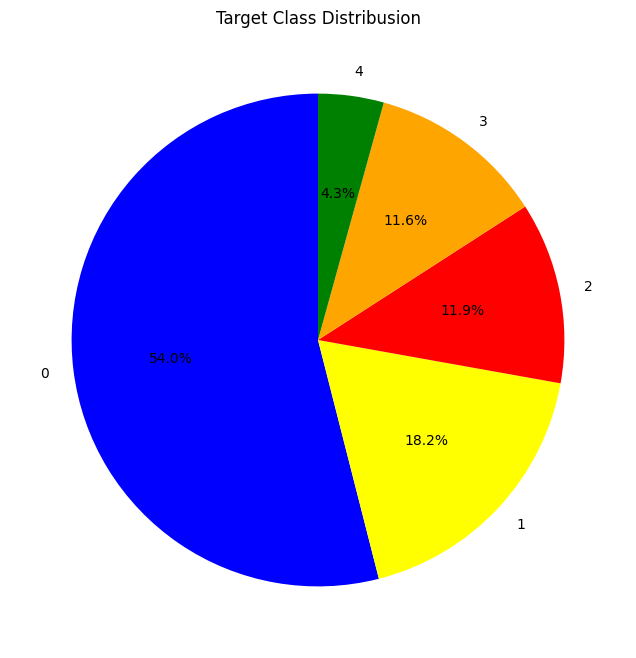

In [72]:
target_counts = df['num'].value_counts()
labels = [f'{i}' for i in target_counts.index]
colors = ['blue','yellow','red','orange','green']

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Target Class Distribusion')
plt.show()

In [75]:
x = df.iloc[:, :-1]
y = df['num']

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_oversample, y_oversample = smote.fit_resample(x, y)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_oversample, y_oversample, test_size = 0.3, random_state = 42,stratify = y_oversample)

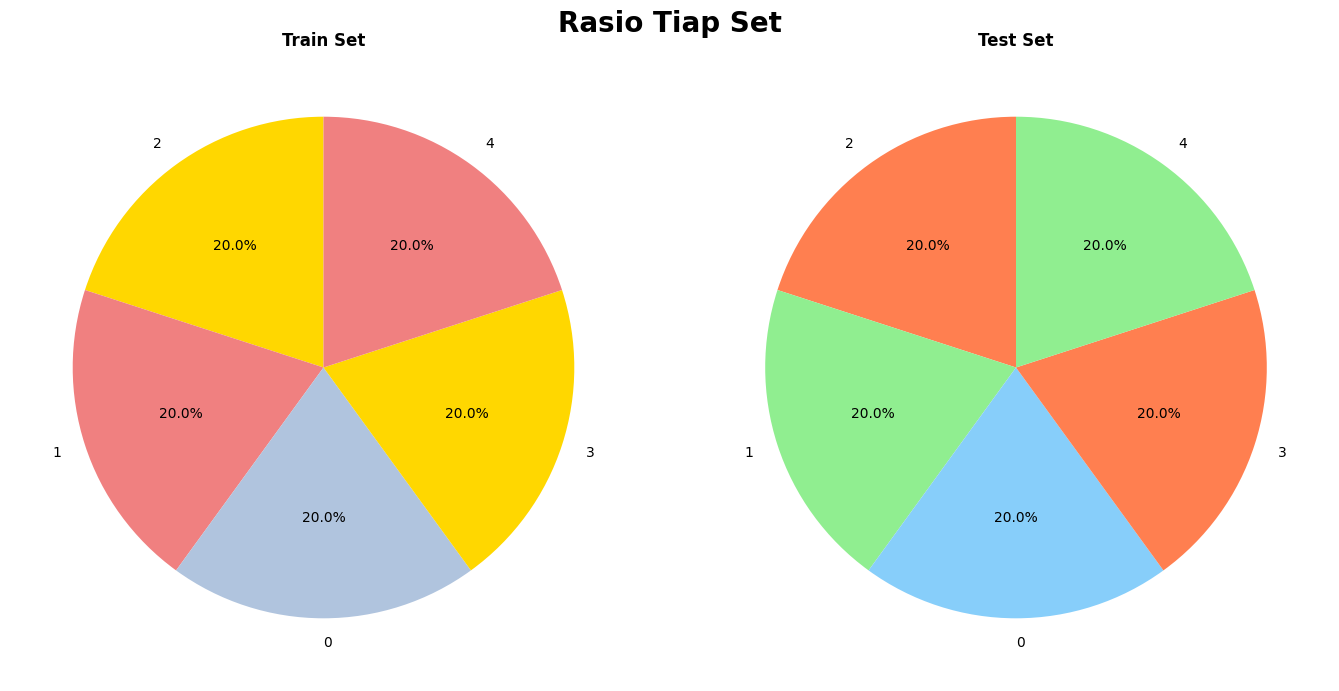

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['num'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

In [80]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

knn_acc = accuracy_score(y_test, knn_pred)
print('K-Nearest Neighbor Model memiliki akurasi', f'{round(knn_acc*100, 2)}%')

K-Nearest Neighbor Model memiliki akurasi 64.49%


In [86]:
from sklearn.metrics import (classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve, roc_auc_score,
                             auc, precision_recall_curve)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        49
           1       0.58      0.53      0.55        49
           2       0.65      0.61      0.63        49
           3       0.75      0.82      0.78        49
           4       0.65      0.82      0.72        49

    accuracy                           0.64       245
   macro avg       0.64      0.64      0.64       245
weighted avg       0.64      0.64      0.64       245



In [88]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 8,n_estimators = 25,random_state = 42)

rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

rf_acc = accuracy_score(y_test, rf_pred)
print('Random Forest Model memiliki akurasi', f'{round(rf_acc*100, 2)}%')

Random Forest Model memiliki akurasi 82.45%


In [89]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        49
           1       0.77      0.69      0.73        49
           2       0.85      0.71      0.78        49
           3       0.79      0.92      0.85        49
           4       0.85      0.94      0.89        49

    accuracy                           0.82       245
   macro avg       0.82      0.82      0.82       245
weighted avg       0.82      0.82      0.82       245



In [92]:
from sklearn.svm import SVC


svm_model = SVC(random_state=42)

svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)

svm_acc = accuracy_score(y_test, svm_pred)
print('Support Vector Machines (SVM) Model memiliki akurasi', f'{round(svm_acc*100, 2)}%')


Support Vector Machines (SVM) Model memiliki akurasi 37.55%


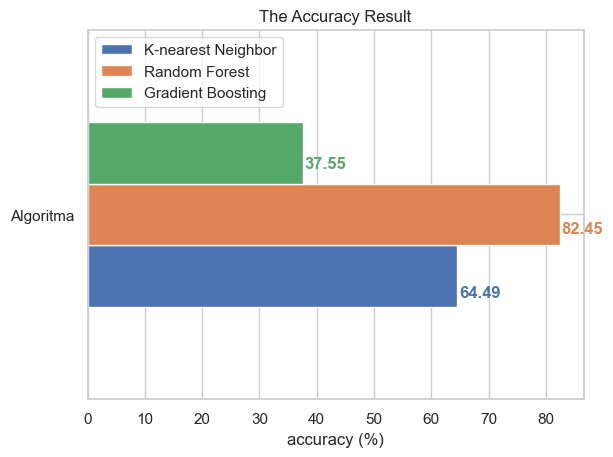

In [94]:
all_acc = pd.DataFrame({'Model Accuracy': ['Algoritma'],
                        'K-nearest Neighbor': [round(knn_acc*100, 2)],
                        'Random Forest': [round(rf_acc*100, 2)],
                        'Gradient Boosting': [round(svm_acc*100, 2)]})

# visualize the accuracy recap
sns.set_theme(style = 'whitegrid')
ax = all_acc.plot.barh()
ax.set(yticklabels = all_acc['Model Accuracy'])

# visualize the number of accuracy
for i, v in enumerate(all_acc['K-nearest Neighbor']):
    plt.text(v + .3, i - .225, str(v),
             color = '#4C72B0', fontweight = 'bold')

for i, v in enumerate(all_acc['Random Forest']):
    plt.text(v + .3, i - .05, str(v),
             color = '#DD8452', fontweight = 'bold')

for i, v in enumerate(all_acc['Gradient Boosting']):
    plt.text(v + .3, i + .125, str(v),
             color = '#55A868', fontweight = 'bold')

plt.title('The Accuracy Result')
plt.ylabel('')
plt.legend(loc = 'upper left')
plt.xlabel('accuracy (%)')
plt.show()